In [13]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    random_state=42,
    n_init=10
)

y_kmeans = kmeans.fit_predict(X)


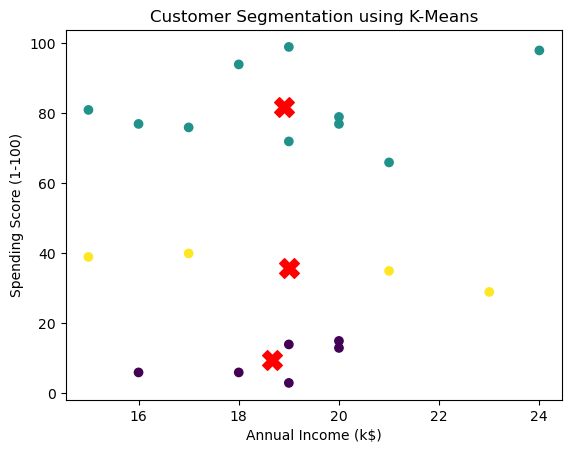

In [17]:
# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[ :, 1], s=200, c='red', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.show()

In [22]:
kmeans_random =KMeans(n_clusters=3 ,init= 'random', random_state= 42)
y_kmeans_random = kmeans_random.fit_predict(X)
print("Clusters Centers(Kmeans++)",kmeans.cluster_centers_)
print("Cluster Centers (Random) :", kmeans_random.cluster_centers_)

Clusters Centers(Kmeans++) [[18.66666667  9.5       ]
 [18.9        81.9       ]
 [19.         35.75      ]]
Cluster Centers (Random) : [[18.66666667  9.5       ]
 [18.9        81.9       ]
 [19.         35.75      ]]


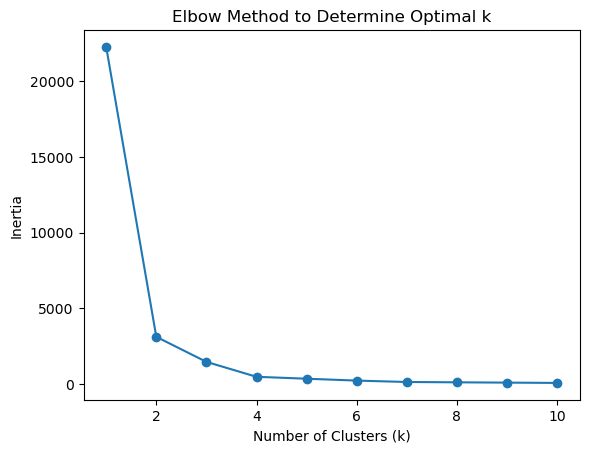

In [23]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia' )
plt.title('Elbow Method to Determine Optimal k')
plt.show()